In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
hotels = pd.read_excel("D:/STUDIES/Data Visualization/Data/HotelCustomersDataset.xlsx")

In [3]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
country_rev = hotels.groupby('Nationality')\
                .agg({"LodgingRevenue":"sum"})\
                .sort_values(by="LodgingRevenue", ascending = False)

In [12]:
country_rev.head()

,LodgingRevenue
Nationality,
FRA,3809315.59
DEU,3113382.55
PRT,2715008.72
GBR,2693123.61
ESP,1475909.33


In [30]:
pie_data = pd.concat([country_rev.iloc[:5], 
                           pd.DataFrame({"LodgingRevenue": country_rev.iloc[5:,0].sum()}, index=["OTH"])])\
                            .sort_values(by="LodgingRevenue", ascending=False)

In [31]:
pie_data

,LodgingRevenue
OTH,11170126.66
FRA,3809315.59
DEU,3113382.55
PRT,2715008.72
GBR,2693123.61
ESP,1475909.33


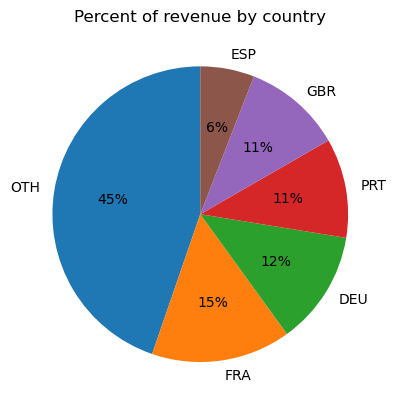

In [39]:
fig, ax = plt.subplots()

ax.pie(
    x = pie_data["LodgingRevenue"],
    startangle=90,
    labels = pie_data.index,
    autopct="%.0f%%"
);

ax.set_title("Percent of revenue by country");

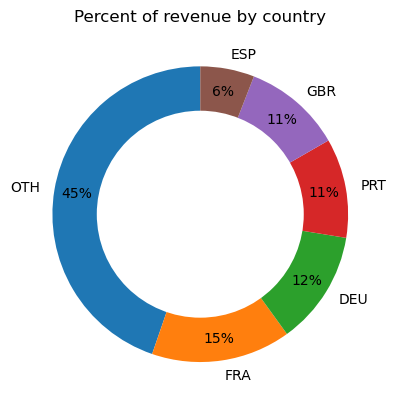

In [46]:
fig, ax = plt.subplots()

ax.pie(
    x = pie_data["LodgingRevenue"],
    startangle=90,
    labels = pie_data.index,
    autopct="%.0f%%",
    pctdistance=.85
);

hole = plt.Circle((0,0), 0.70, fc="white")
fig = plt.gcf()

fig.gca().add_artist(hole)

ax.set_title("Percent of revenue by country");